# Aykırı Gözlem Analizi

# TEK DEĞİŞKENLİ

## Aykırı Değerleri Yakalamak

In [16]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna() # aykırı degerler ile rahat ugraşmak için eksik değerlerin hepsini sildik.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [17]:
df_table = df["table"]

In [18]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

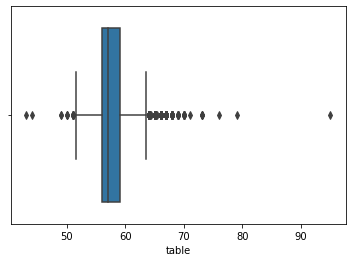

In [19]:
sns.boxplot(x = df_table);

In [20]:
Q1 = df_table.quantile(0.25) # değişkenin %25. degeri
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [21]:
Q1

56.0

In [22]:
Q3

59.0

In [23]:
IQR

3.0

In [24]:
alt_sinir = Q1- 1.5*IQR # formül 56 - (4,5)
ust_sinir = Q3 + 1.5*IQR

In [25]:
# 2 boşluk arası işlemi ben yaptm... Personally :d

In [26]:
x=(df_table>ust_sinir)
x

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [27]:
df_table[x]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [28]:
df_table[x]=ust_sinir
df_table[x]

C:\Users\bedir\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 589, dtype: float64

In [29]:
alt_sinir

51.5

In [30]:
ust_sinir

63.5

In [31]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [32]:
aykiri_tf = (df_table < alt_sinir) #Takip edebilmek adına sadece alt sınırı dahil ettik.

In [33]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [34]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [35]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Aykırı Değer Problemini Çözmek

In [36]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### Silme

In [37]:
import pandas as pd

In [38]:
type(df_table)

pandas.core.series.Series

In [39]:
df_table = pd.DataFrame(df_table)

TypeError: 'dict' object is not callable

In [ ]:
df_table.shape

In [ ]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)] 
#aykırı olmayan değerlere eriştik. 

In [ ]:
t_df.shape

### Ortalama ile Doldurma

In [ ]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

In [ ]:
df_table = df["table"]

In [ ]:
aykiri_tf.head()

In [ ]:
df_table[aykiri_tf]

In [ ]:
df_table.mean()

In [ ]:
df_table[aykiri_tf] = df_table.mean() 

In [ ]:
df_table[aykiri_tf]

### Baskılama Yöntemi

In [ ]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

In [ ]:
df_table = df["table"]

In [ ]:
df_table[aykiri_tf]

In [ ]:
alt_sinir

In [ ]:
df_table[aykiri_tf] = alt_sinir

In [ ]:
df_table[aykiri_tf]

## Çok Değişkenli Aykırı Gözlem Analizi

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.


In [40]:
# yaş ve evlat listesi düşünelim ve listenin bir satırında 17 yaşında 3 çocuklu birey olsun. 
# yaş ve 3 çocuk tek başına normalken, 17 yaşında 3 çocuklu birey aykırıdır.
# işte bu gibi durumları gözlemlemek için kullanılır.

In [41]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64']) 
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [42]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [43]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
#local outlier factor= yerel aykırı faktör
#n_neighbors= komşu sayısı
#contamination = yoğunlugu ifade ediyor

In [44]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [45]:
#şimdi, elimizde skorlar var. bir bakalım
df_scores = clf.negative_outlier_factor_ # = negatif aykırı deger faktörleri

In [46]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [47]:
np.sort(df_scores)[0:20]
# 2. degerden sonra nasıl azaldığına bakalım 
# şimdi biz bir eşit değer belirleyelim 
# bu deger şimdilik rasgele olsun.= esik_deger

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [48]:
esik_deger = np.sort(df_scores)[13] # 13 ü kafaya göre belirledik.
import numpy as np
x=np.array([1,2,3,2,6])
x
x = df_scores > esik_deger
x

array([ True,  True,  True, ...,  True,  True,  True])

In [49]:
aykiri_tf = df_scores > esik_deger

In [50]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [51]:
### silme yöntemi

In [52]:
yeni_df  = df[df_scores > esik_deger]

In [53]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [54]:
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


## Çok Değişkenlide Baskılama

In [55]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [56]:
baski_deger = df[df_scores == esik_deger]
baski_deger

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [57]:
aykirilar = df[~aykiri_tf]

In [58]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


önümüzdeki işlemde elimizdeki mevcur aykırıların yerine eşik değerdeki degerleri atayacağımızdan dolayı
bazı index problemleri çıkıyor. bu problemleri giderebilmek için önce,

1- Aykırılar df sini indexssiz bir arre'e çeviricez.

2- Sonra baskı gözleminide arrayleştirip atama işlemini gerçekleştiricez 

3- sonbasamaktada aykırı değerleri askı degerleri ile değiştirmiş olacağız.

In [59]:
aykirilar.to_records(index = False)
#aykırılar normalde yukarıdaki gibi iken bu işlem ile indexleri sildik, numpy array'e çevirdi.

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [60]:
res = aykirilar.to_records(index = False)

In [61]:
res[:] = baski_deger.to_records(index = False)
# sonra resin tüm degerlerine aykırı degerimizi atadık.

In [62]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [63]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [64]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index) # indeksleri ile birlikte res'i 
                                                                 # aykiri degere esitledik.

TypeError: 'dict' object is not callable

In [ ]:
df[~aykiri_tf]

# Eksik Veri Analizi

-Eksik verileri direk silemeyiz. Önce yapısal mı? Rastlantısalmı bakılmalı. Yapısal bir eksik ise bu veriye elleyemeyiz. 

-NA her zaman eksiklik anlamına gelmez. : Kredi kartı olan biri hiç harcama yapmadıgından harcama egeri NA olabilir mesela. 

**Rassallık Test edilmeli**

Görsel Teknikler, Bağımsız 2 örneklem T testi, Korealsyon testi ve Little'nin MCAR testi ile yapılabilir. Genelde görsel teknikler ve MCAR testini kullanırız.

**Eksik Veri**

**Tamamen rastlantısal** Tamamen ratslantısal
 
**Rastlnatısal** Bir şekilde diğer değişkenlerle ilişkili olabilir.

**Yapısal:** Hiç kredi almamış birinin (0) kredi kartı harcaması NaN olabilir mesela yani başka bir değişken ile ilişkili.

olarak 3 e ayrılır ve duruma göre işlem yapılır. 



### Eksik veri problemi giderme yöntemleri

**Silme Yöntemleri,**

Gözlem ya da değişken silme, Liste bazında silme, Çiftler bazında silme. 

**Değer Atama Yöntemleri**

Medyan atama, En benzer birime atama, Dış kaynaklı atama

**Tahmine Dayalı yöntemler**

ML, EM, Çoklu Atama Yönt.



## Eksik Veri için Hızlı Bir Çözüm

In [82]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

TypeError: 'dict' object is not callable

In [ ]:
df.isnull().sum() # eksik değerlere erişelim. 

In [ ]:
df.notnull().sum() # tam değerlere erişelim. 

In [ ]:
df.isnull().sum().sum() 

In [ ]:
df.isnull()

In [ ]:
df[df.isnull().any(axis = 1)] # en az bir eksik deger varsa fancy index ile seçtik.

In [ ]:
df[df.notnull().all(axis = 1)] # tüm degerleri tam olan degiskenler.

In [ ]:
df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()]

In [ ]:
#eksik degerlerin direk silinmesi

In [ ]:
df.dropna()# 1 eksik dahi varsa siler

In [65]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [66]:
#basit deger atama

In [67]:
df["V1"]

KeyError: 'V1'

In [ ]:
df["V1"].mean()

In [ ]:
df["V1"].fillna(df["V1"].mean())
# fillna= boşluları doldurma fonksiyonu

In [ ]:
df["V2"].fillna(0)

In [ ]:
df.apply(lambda x: x.fillna(x.mean()), axis = 0) # her bir satırdaki boş değere 
#ortalamayı atadık.

## Eksik Değerlerin Saptanması

In [ ]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

In [ ]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

In [68]:
#veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

0

In [69]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,carat,depth,table,price,x,y,z


In [70]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


## Eksik Veri Yapısının Görselleştirilmesi

In [71]:
!pip install missingno

In [72]:
import missingno as msno

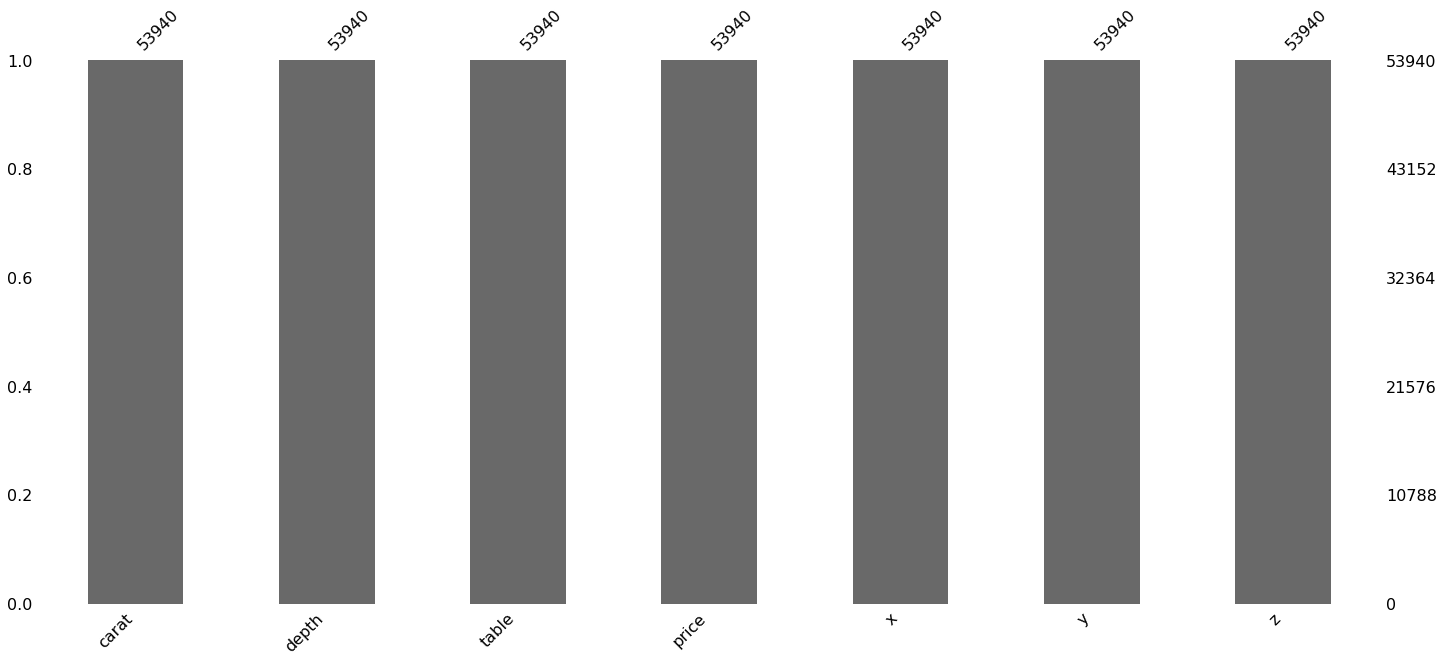

In [73]:
msno.bar(df);

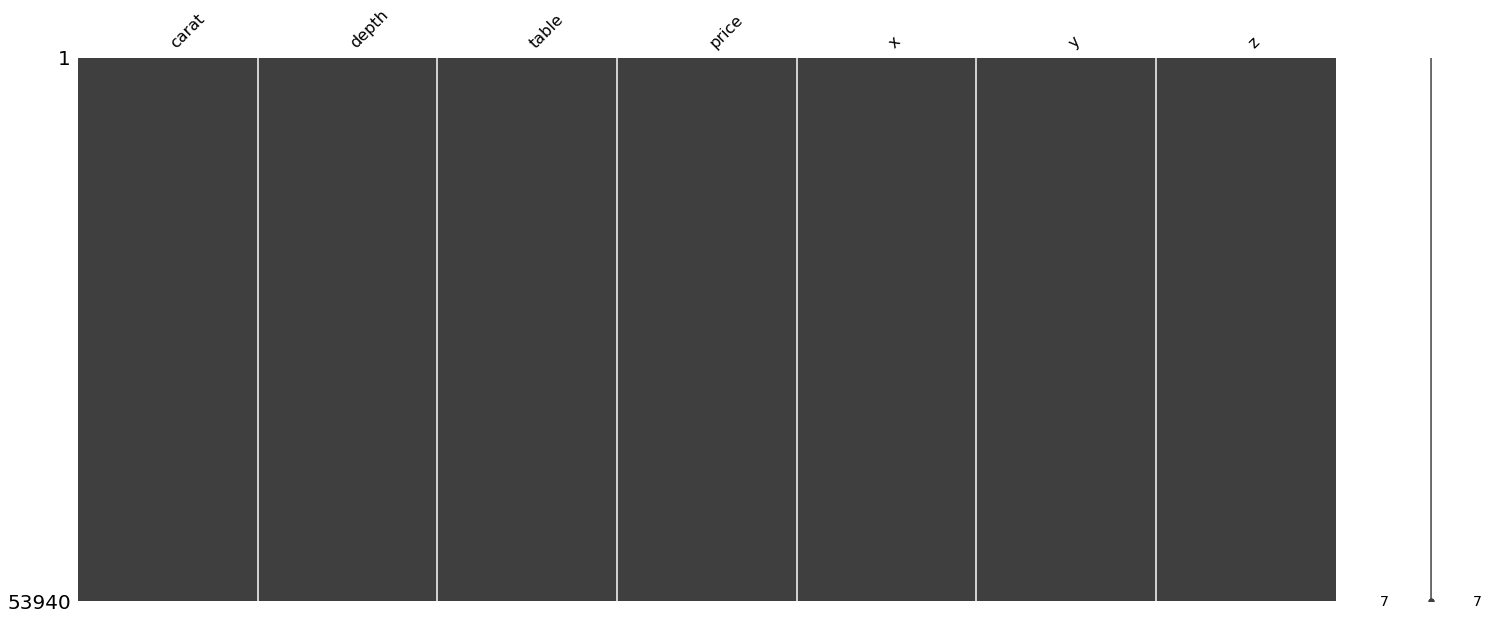

In [74]:
msno.matrix(df);

In [75]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [76]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [77]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

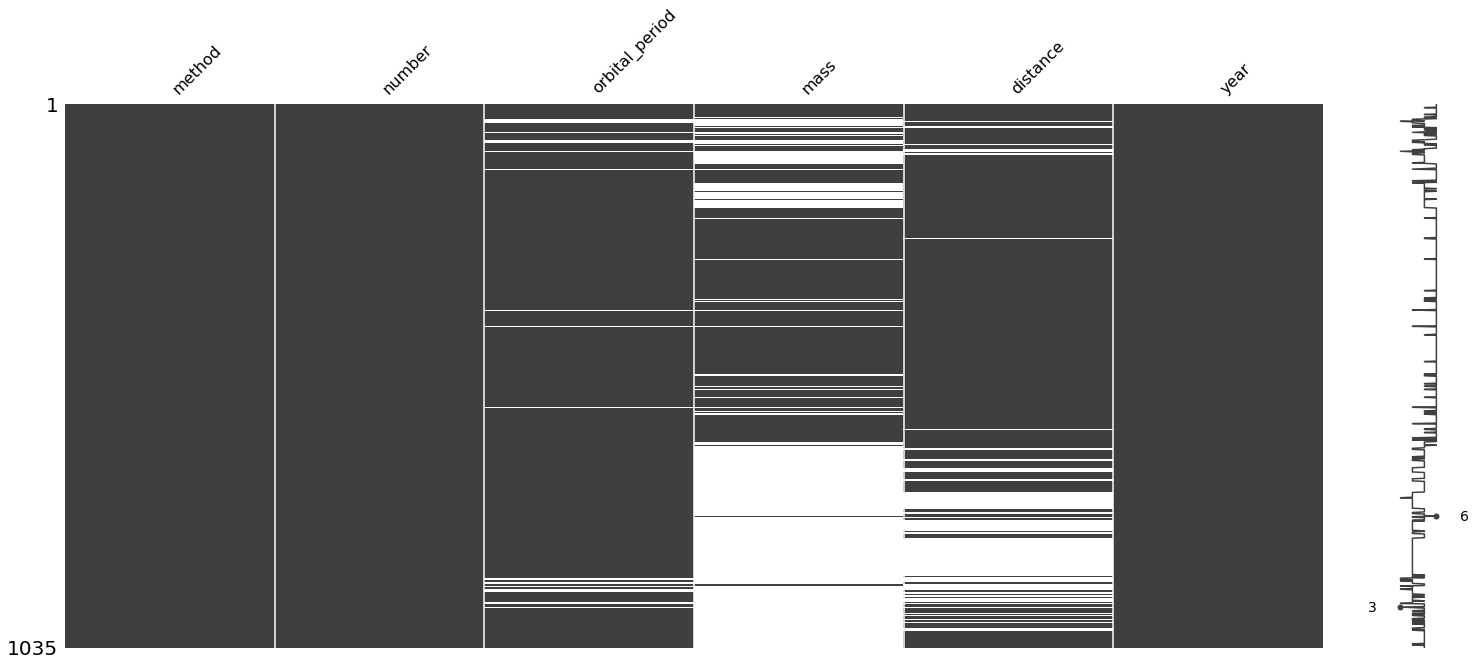

In [78]:
msno.matrix(df);

TypeError: isinstance() arg 2 must be a type or tuple of types

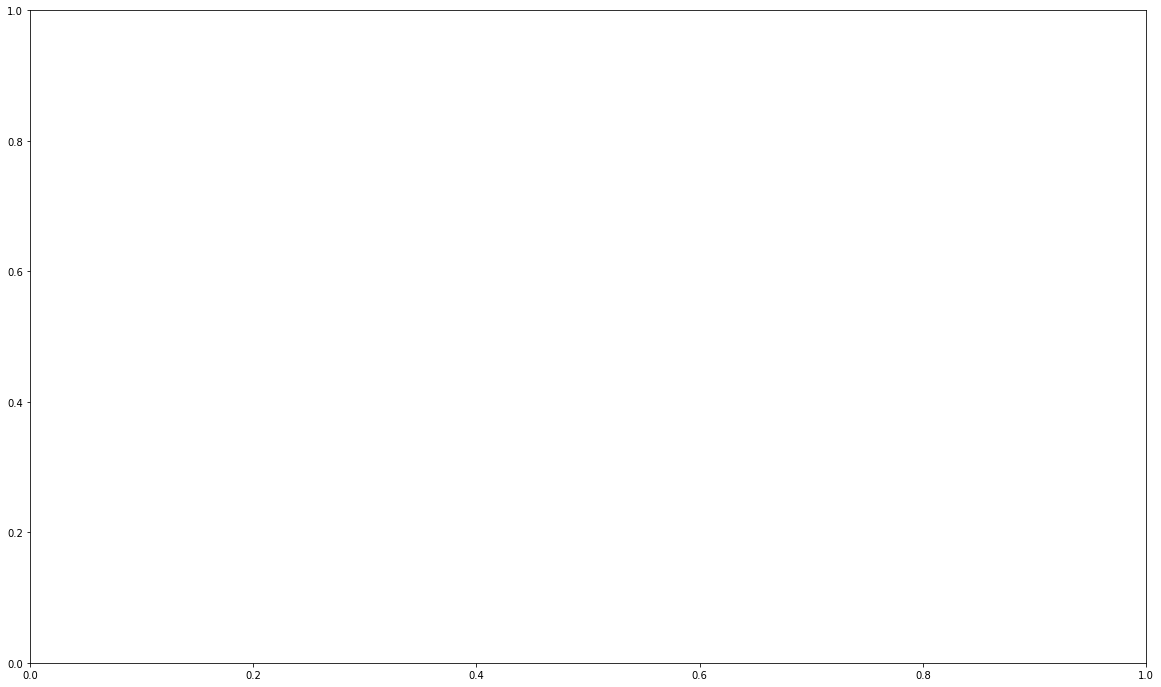

In [79]:
msno.heatmap(df);

## Silme Yöntemleri

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

In [ ]:
df.dropna() # en az bir eksik degere sahip tüm gözlemler silindi 

In [ ]:
df

In [ ]:
df.dropna(how = "all") # sadece bütün gözlemleri eksik olan gözlemleri sildik.  

In [ ]:
df.dropna(axis = 1) #bunu yaptığımızda her eksik dege sahip sütunu (hepsi) sil dedik 

In [ ]:
df.dropna(axis = 1, how = "all")

In [ ]:
df["sil_beni"] = np.nan

In [ ]:
df

In [ ]:
df.dropna(axis = 1, how = "all")

In [ ]:
df

In [ ]:
df.dropna(axis = 1, how = "all", inplace = True)

In [ ]:
df

## Değer Atama Yöntemleri

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

Sayısal degerlerde atama

In [ ]:
#sayısal degiskenlerde atama 

In [ ]:
df["V1"].fillna(0)

In [ ]:
df

In [ ]:
df["V1"].fillna(df["V1"].mean())

In [ ]:
#tum degiskenler icin birinci yol
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [ ]:
#ikinci yol

In [ ]:
df.fillna(df.mean()[:]) # her eksige kendi sütununun ortalamsı verildi
#df.fillna dedigimizde bütün değişkenlerde doldurma işlemi yapacagını biliyor 
#çünkü vektörek fonksiyon

In [ ]:
df.fillna(df.mean()["V1":"V2"])

In [ ]:
df["V3"].fillna(df["V3"].median())

In [ ]:
#ucuncu yol

In [ ]:
df.where(pd.notna(df), df.mean(), axis = 1) # axis= "columns" da diyebilirdik. 

## Kategorik Değişken Kırılımında Değer Atama

In [ ]:
#ileri seviye ihtiyaçlardan biridir

**Burada problem şu;** 

Bir şirket düşünelim ve maaşı bilinmeyen çalışanlar olsun.Bu durumda maaşı bilinmeyen
çalışanlarının maaşını ortamaa deger yapamayız. Çünkü şirkette bir hiyerarşi vardır 
ve buna göre maaşlar belirlenir. Bu kategori farkı göz önünde bulundurulmalıdır.

Yani eğer, pazarlama departmanı kategoriine göre yeni değer ata, arge kategorisine göre yeni deger ata dersek çok daha verimli olacaktır.

In [ ]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

In [ ]:
#şimdi veri manipülasyonunu hatırlayalım.
df.groupby("departman")["maas"].mean()

In [ ]:
#şimdi maaş değişkenindeki boş değerleri, DEPARTMANA GÖRE doluralım.
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))
#fillna(neye göre doldurayım? === df.groupby("departman")["maas"].transform("mean"))
#"df.groupby("departman")["maas"]" = departmana göre grupladık ve maaşı seçtik.
#transform("mean") = "neyi dönüştüreceğim?" = mean

## Kategorik Değişkenler için Eksik Değer Atama

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

In [ ]:
#en verimli ve kullanılan yöntem ilgili değişkenin modunu, en çok kullanılan degerini 
# atamaktır

In [ ]:
df["departman"].mode()[0]

In [ ]:
df["departman"].fillna(df["departman"].mode()[0])

In [ ]:
df

In [ ]:
# eksik değerleri sonrasındaki değerler ile doldurmak istediğimizde,
#method="bfill argümanını ekleriz"
df["departman"].fillna(method = "bfill")

In [ ]:
# eksik değerleri sonrasındaki değerler ile doldurmak istediğimizde,
#method="bfill argümanını ekleriz"
df["departman"].fillna(method = "ffill")

## Tahmine Dayalı Değer Atama Yöntemleri

In [ ]:
# ELİMİZDEKİ EKSİK DEĞİŞKEN MAKİNE ÖĞRENMESİ ALGORİTMALARI İLE DİĞER DEĞİŞKENLERCE MODELLENİP
# BUNA GÖRE DOLDURULUR.

### KNNİMPUT

In [ ]:


import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

In [ ]:
!pip install ycimpute

In [ ]:
from ycimpute.imputer import knnimput

In [ ]:
#veri setini numpy arrayine çeviricez çümkü knnimput bizden bir numpy array bekliyor
#doalyısıyla öne numpy arrayine donusturup veriyi saklıcaz ve sonra tekrar atama yapacagız 
var_names=list(df) # isimleri sakladık. 
#list(df)=bize columns'u verir denendi, Bu işlmi df nin ismleini bir yerde saklmak için yaptık
import numpy as np
n_df=np.array(df)
# numpy array yaptıgımız n_df imizi görüntüleelim
n_df[0:10]

In [ ]:
n_df.shape

In [ ]:
dff = knnimput.KNN(k = 4).complete(n_df) # Complate () = (Nereyi doldurayım?)
#k burada komşuluk sayısını ifade eder
#bu kısımlar zaten makine öğrenmesi bölümünde detaylıca işlenecek. şimdilik hızlıca geçelim.

In [ ]:
type(dff)

In [ ]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
type(dff)

In [ ]:
dff.isnull().sum()

### RANDOM FOREST

In [ ]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [ ]:
df.isnull().sum()

In [ ]:
var_names = list(df)

In [ ]:
import numpy as np
n_df = np.array(df)

In [ ]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

## EM algoritması ile doldurma 

In [ ]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [ ]:
from ycimpute.imputer import EM

In [ ]:
var_names = list(df)

In [ ]:
import numpy as np
n_df = np.array(df)

In [ ]:
dff = EM().complete(n_df)

In [ ]:
dff = pd.DataFrame(dff, columns = var_names)

In [ ]:
dff.isnull().sum()

# Değişken Standardizasyonu (Veri Standardizasyonu)

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

## Standardizasyon

In [ ]:
from sklearn import preprocessing 

In [ ]:
preprocessing.scale(df)
#preprocessing= ön işleme

In [ ]:
df

In [ ]:
df.mean()

In [ ]:
## Normalizasyon

In [ ]:
preprocessing.normalize(df) #0-1 arasına dönüştürmek için 

## Min-Max Dönüşümü
**istediğimiz 2 aralık**

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [ ]:
scaler.fit_transform(df)

## Değişken Dönüşümleri

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

### 0-1 Dönüşümü

In [ ]:
#bazen eldeki değişken kategorik olsada ilgili fonksiyon bizden numerilk deger isteyebilir.
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [ ]:
lbe.fit_transform(df["sex"])

In [ ]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])
#yaparak numerik yeni_sex değişkenini ekledik

In [ ]:
df.head()

**Karıştırılmaması gereken şey;** 

İlgilendiğimiz durum, "Ana Odağımız" 1 değerini alır, yani hayatta kalmakla ilgileniyorsak;
hayatta kalmak=1 ölmek 0
erkeklerle ilgileniyorsak erkek =1 kadın = 0 deriz. ileride bu ayrıntı işe yarayacak

In [ ]:
#Peki veri setimizde 2 den fazla sınıf var ise ?

### "1 ve Diğerleri (0) " Dönüşümü

In [ ]:
df.head()

In [ ]:
import numpy as np 
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)
#df["day"].str 'i string olarak değerlendir ve,
#.contains("sun"),1,0  eğer string içinde sun var ise 1 yoksa 0 de, 
#YANİ TÜM SUNLAR 1 DİĞERLERİ 0 OLDUf

In [ ]:
df["day"].str.contains("Sun") # koşulunu sağlayanlara(True) 1 sağlamayanlara(False)

In [ ]:
df

### Çok Sınıflı Dönüşüm

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [ ]:
lbe.fit_transform(df["day"])

In [ ]:
#cok dikkat 

In [ ]:
# eger böyle bir işlem yaptıysak,
# dikkat etmeliyiz. çünkü normalde kategorik olan değişkenler bu dönüşümle birlikte sanki
# birer nominal değişkenmiş gibi bir sırlaamişlemine tabi tutuldu ve buda makine öğrenmesi
# algoritmasının kafasını karıştıracaktır.
# yani bir çok probleme sebep olup algoritmaları şaşırtabilir. 

In [ ]:
#PEEEKİİİİİİİİİİİİİİİİİİİİİİİİİİİİİ... BU DURUMDA NE YAPMALI? 

In [ ]:
# ONE HOT DÖNÜŞÜMÜ YAPILMALI. AMA BU DURUMDA DA BİR TUZAK OLACAK. BUNU DA AŞACAGIZ.. 
# COME WİTH US. 

### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [ ]:
df.head()

In [ ]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sexxx"])

In [ ]:
df_one_hot.head()

In [ ]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()
# bu şekilde dönüşüm yaptığımızda, eğer bir kategorik değişkenin bir sınıfında
# bir yogunluk var ise, dikeye taşıdıgımız bu kategorilerin etkisi algoritmaya
# daha fazla hissettirilecek. 

# Bölüm Sonu Değerlendirmesi

Veri Ön İşleme 

Aykırı Gözlem Analizi

Eksik Gözlem Analizi

Değişken Standartlaştırma

Değişken Dönüştürme

In [80]:
import pandas as pd 
import numpy as np 
 
#generate a dataframe with random number for age from 0 - 9 
df_age = pd.DataFrame(np.random.randint(low=0, high=9, size=(100, 1)),columns = ['age']) 
 
 
#set up bins 
bin = [0,3,6,9] 
#use pd.cut function can attribute the values into its specific bins 
category = pd.cut(df_age.age,bin) 
category = category.to_frame() 
category.columns = ['range'] 
#concatenate age and its bin 
df_new = pd.concat([df_age,category],axis = 1) 

TypeError: 'dict' object is not callable

In [81]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

TypeError: 'dict' object is not callable

In [83]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

TypeError: 'dict' object is not callable